In [2]:
import pandas as pd
diabetes = pd.read_csv('pima-indians-diabetes.csv')
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [3]:
cols_to_norm = diabetes.columns[:-3]

In [4]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x : (x-x.min())/(x.max() - x.min()))
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [5]:
import tensorflow as tf

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [10]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group', ['A', 'B', 'C', 'D'])
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)
labels = diabetes['Class']
x_data = diabetes.drop('Class',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)


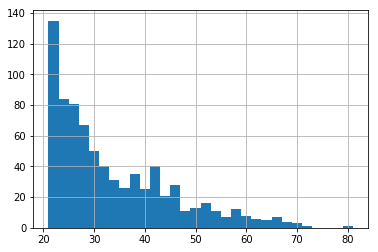

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
diabetes["Age"].hist(bins = 30)

In [9]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

In [11]:
# Define input function to be used for training data
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,
                                                 y=y_train,
                                                 batch_size=10,
                                                 num_epochs=1000,
                                                 shuffle=True)
# Default n_classes is 2
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\User\\AppData\\Local\\Temp\\tmp7n3_d9wj', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001A79FC90588>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into

In [13]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, y =y_test, 
                                                     batch_size = 10, 
                                                     num_epochs = 1,
                                                     shuffle = False)
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-07-27-03:33:18
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\User\AppData\Local\Temp\tmp7n3_d9wj\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-07-27-03:33:20
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.71653545, accuracy_baseline = 0.65748036, auc = 0.7848785, auc_precision_recall = 0.6230654, average_loss = 0.5338998, global_step = 1000, label/mean = 0.34251967, loss = 5.2157903, precision = 0.5925926, prediction/mean = 0.37165526, recall = 0.55172414
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: C:\Users\User\AppData\Local\Temp\tmp7n3_d9wj\model.ckpt-1000


In [14]:
results

{'accuracy': 0.71653545,
 'accuracy_baseline': 0.65748036,
 'auc': 0.7848785,
 'auc_precision_recall': 0.6230654,
 'average_loss': 0.5338998,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.2157903,
 'precision': 0.5925926,
 'prediction/mean': 0.37165526,
 'recall': 0.55172414}

In [15]:
# No y is provided because we don't really know what's the actual "y" value
pred_input_func = tf.estimator.inputs.pandas_input_fn(x = X_test, batch_size = 10, num_epochs = 1, shuffle = False)

In [17]:
predictions = model.predict(pred_input_func)
list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\User\AppData\Local\Temp\tmp7n3_d9wj\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.54787654], dtype=float32),
  'logits': array([0.19209456], dtype=float32),
  'probabilities': array([0.4521235 , 0.54787654], dtype=float32)},
 {'class_ids': array([1], dtype=int64),
  'classes': array([b'1'], dtype=object),
  'logistic': array([0.6339081], dtype=float32),
  'logits': array([0.5490196], dtype=float32),
  'probabilities': array([0.36609188, 0.6339081 ], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.3960627], dtype=float32),
  'logits': array([-0.42189795], dtype=float32),
  'probabilities': array([0.6039373 , 0.39606267], dtype=float32)},
 {'class_ids': array([0], dtype=int64),
  'classes': array([b'0'], dtype=object),
  'logistic': array([0.31867522], dtype=float32),
  'logits': array([-0.7598666], dtype=float32),
  'probabilities': array([0.6813248 , 0.31867525], dtype=float32)},
 {'class_i

In [18]:
# hidden_units define how many neurons/layers
# [10, 10, 10] implies 3 layers with 10 neurons each
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10, 10, 10],
                                      feature_columns = feat_cols,
                                      n_classes = 2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\User\\AppData\\Local\\Temp\\tmpbyrt2bbi', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000001A79C7EE550>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [21]:

feat_cols

[_NumericColumn(key='Number_pregnant', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Glucose_concentration', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Blood_pressure', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Triceps', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Insulin', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='BMI', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _NumericColumn(key='Pedigree', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None),
 _VocabularyListCategoricalColumn(key='Group', vocabulary_list=('A', 'B', 'C', 'D'), dtype=tf.string, default_value=-1, num_oov_buckets=0),
 _BucketizedColumn(source_column=_NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_

In [26]:
# Placeholders
x = tf.placeholder(tf.float32, shape = [None, 784])
# Variables
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
# Create Graph Functions
z = tf.matmul(x, W) + b
# Loss function
z_true = tf.placeholder(tf.float32, [None, 10])
# Tensorflow's built in cross entropy loss function
# Pass in true values, actual predictions, then calculate cross entropy loss
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = z_true, logits= z))
# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.5)
train = optimizer.minimize(cross_entropy)
# Create session and run
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(100)
        sess.run(train, feed = {x: batch_x, y_true: batch_y})
        
    correct_prediction = tf.equal(tf.argmax(y, axis =1), tf.argmax(y_true, 1))
    # argmax gives index position of the highest entry point
    # correct_prediction give a list of TRUEs and FALSEs
    # tf.reduce_mean calculates the mean of a reduced axis
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    print(sess.run(accuracy, feed_dict = {x: mnist.test.images,
                                         y_true: mnist.test.labels}))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



NameError: name 'mnist' is not defined